# Data Cleaning


In [2]:
# import Libraries 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# reading data
df = pd.read_csv('C:\Games\Course\Pinnacle Full Stack\Customer Segmentation\E-commerce Customer Behavior - Sheet1.csv')

In [4]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [478]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [480]:
# show null values
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [6]:
# showing the Null Rows
null_rows_df = df[df.isnull().any(axis=1)]
null_rows_df

KeyError: 'fbs'

In [482]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [483]:
df[['City','Satisfaction Level']].value_counts()

City           Satisfaction Level
New York       Satisfied             59
Chicago        Unsatisfied           58
Miami          Unsatisfied           58
San Francisco  Satisfied             58
Houston        Neutral               56
Los Angeles    Neutral               51
               Satisfied              8
dtype: int64

In [484]:
# filling the null values
df.fillna('Neutral', inplace=True)

In [485]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

# Data Exploration 

In [486]:

filter_by_MI = df[['Membership Type','Items Purchased']].value_counts()
print(filter_by_MI)
print('we can see that the type of Membership i differ according the number of item purchased \n The Bronze play from  range 7:10 \n The Silver play from  range 10:14 \n The Gold play from  range   14:21 ')

Membership Type  Items Purchased
Bronze           9                  34
                 8                  33
Silver           12                 33
                 13                 32
                 11                 28
Bronze           7                  25
                 10                 24
Gold             15                 24
                 16                 24
                 21                 24
Silver           10                 23
Gold             20                 19
                 14                 10
                 18                  9
                 19                  6
                 17                  1
Silver           14                  1
dtype: int64
we can see that the type of Membership i differ according the number of item purchased 
 The Bronze play from  range 7:10 
 The Silver play from  range 10:14 
 The Gold play from  range   14:21 


In [487]:
# make a filter by Total Spend Row according to Membership Row
filt_by_Spend = (df['Total Spend'] <= 831) & (df['Total Spend'] >= 531)

In [488]:
filt_by_Spend_count = df.loc[filt_by_Spend,['Membership Type']].value_counts()
print(filt_by_Spend_count)
print('people who spend more than 831 are gold')
print('and people who spend less than 531 are bronze')
print('between 831 and 531 are silver' )

Membership Type
Silver             117
dtype: int64
people who spend more than 831 are gold
and people who spend less than 531 are bronze
between 831 and 531 are silver


In [489]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


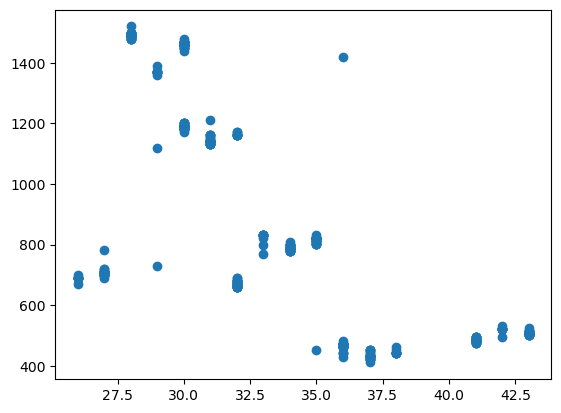

In [490]:
# Make a scatter plot for age and Total Spend
plt.scatter(df['Age'],df['Total Spend'])

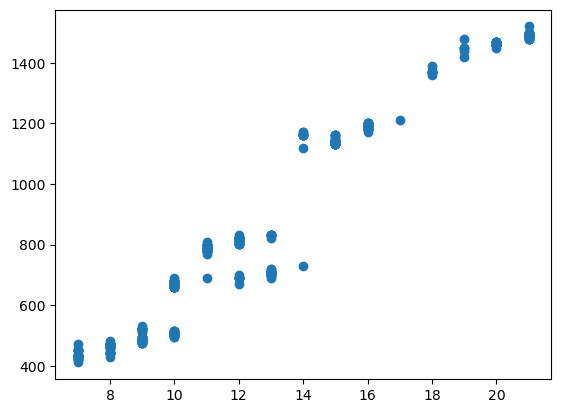

In [491]:
# Make a scatter plot for total spend and item Purchas
plt.scatter(df['Items Purchased'],df['Total Spend'])

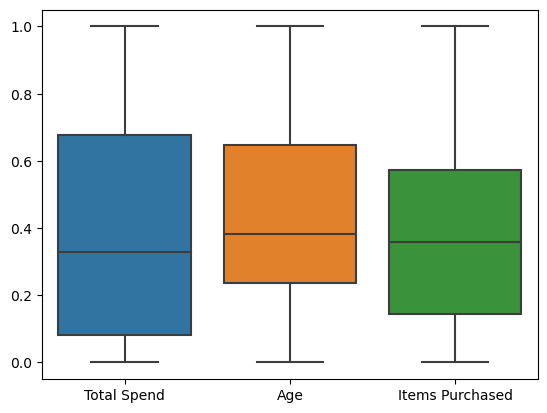

In [514]:
# showing if there is outlier
sns.boxplot(data=df[['Total Spend', 'Age', 'Items Purchased']])
plt.show()


# Apply KMeans Clustering

In [492]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [493]:
y_predicted = km.fit_predict(df[['Age','Total Spend','Items Purchased']])
y_predicted

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,

In [494]:
df['cluster'] = y_predicted

In [495]:
# Assuming df is your original DataFrame
cdf = pd.concat([df['Age'], df['Total Spend'], df['Items Purchased'], df['cluster']], axis=1)
cdf

,Age,Total Spend,Items Purchased,cluster
0,29,1120.20,14,0
1,34,780.50,11,1
2,43,510.75,9,2
3,30,1480.30,19,0
4,27,720.40,13,1
...,...,...,...,...
345,32,660.30,10,1
346,36,470.50,8,2
347,30,1190.80,16,0
348,34,780.20,11,1


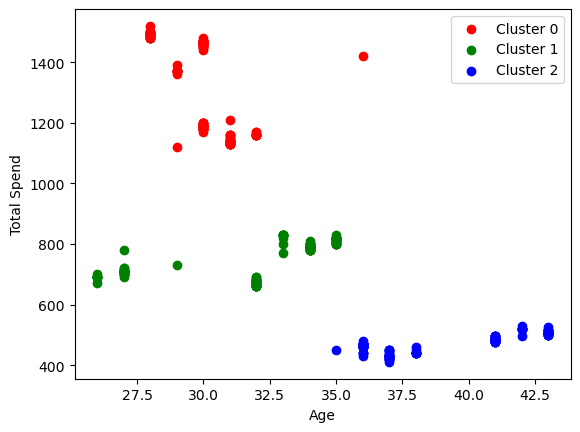

In [496]:
# Subset the DataFrame by clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plotting the scatter plots
plt.scatter(df1.Age, df1['Total Spend'], color='red', label='Cluster 0')
plt.scatter(df2.Age, df2['Total Spend'], color='green', label='Cluster 1')
plt.scatter(df3.Age, df3['Total Spend'], color='blue', label='Cluster 2')

# Labeling the axes
plt.xlabel('Age')
plt.ylabel('Total Spend')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


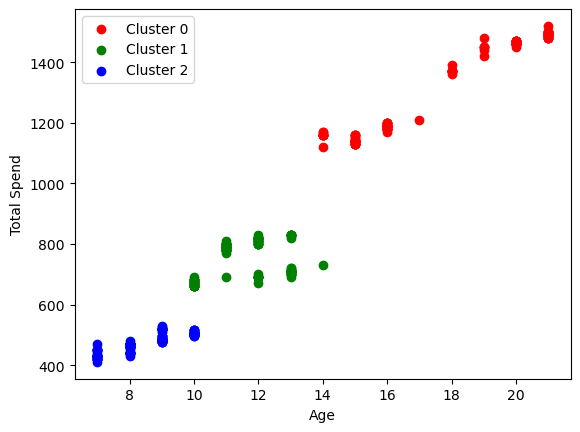

In [497]:
# Subset the DataFrame by clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plotting the scatter plots
plt.scatter(df1[['Items Purchased']], df1['Total Spend'], color='red', label='Cluster 0')
plt.scatter(df2[['Items Purchased']], df2['Total Spend'], color='green', label='Cluster 1')
plt.scatter(df3[['Items Purchased']], df3['Total Spend'], color='blue', label='Cluster 2')

# Labeling the axes
plt.xlabel('Age')
plt.ylabel('Total Spend')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


# Apply Scaling

In [498]:
scaler = MinMaxScaler()
scaler.fit(df[['Total Spend']])
df['Total Spend'] = scaler.transform(df[['Total Spend']])

In [499]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [500]:
scaler.fit(df[['Items Purchased']])
df['Items Purchased'] = scaler.transform(df[['Items Purchased']])

In [515]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,cluster,New_Cluster
0,101,Female,0.176471,New York,Gold,0.639502,0.500000,4.6,True,25,Satisfied,0,1
1,102,Male,0.470588,Los Angeles,Silver,0.333273,0.285714,4.1,False,18,Neutral,1,0
2,103,Female,1.000000,Chicago,Bronze,0.090102,0.142857,3.4,True,42,Unsatisfied,2,2
3,104,Male,0.235294,San Francisco,Gold,0.964122,0.857143,4.7,False,12,Satisfied,0,1
4,105,Male,0.058824,Miami,Silver,0.279095,0.428571,4.0,True,55,Unsatisfied,1,0


In [502]:
y_Newpredicted = km.fit_predict(df[['Age','Total Spend','Items Purchased']])
y_Newpredicted                                                              

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,

In [503]:
df['New_Cluster'] = y_Newpredicted
ncdf = pd.concat([df['Age'], df['Total Spend'], df['Items Purchased'], df['New_Cluster']], axis=1)
ncdf

,Age,Total Spend,Items Purchased,New_Cluster
0,0.176471,0.639502,0.500000,1
1,0.470588,0.333273,0.285714,0
2,1.000000,0.090102,0.142857,2
3,0.235294,0.964122,0.857143,1
4,0.058824,0.279095,0.428571,0
...,...,...,...,...
345,0.352941,0.224917,0.214286,0
346,0.588235,0.053818,0.071429,2
347,0.235294,0.703146,0.642857,1
348,0.470588,0.333003,0.285714,0


In [504]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,cluster,New_Cluster
0,101,Female,0.176471,New York,Gold,0.639502,0.500000,4.6,True,25,Satisfied,0,1
1,102,Male,0.470588,Los Angeles,Silver,0.333273,0.285714,4.1,False,18,Neutral,1,0
2,103,Female,1.000000,Chicago,Bronze,0.090102,0.142857,3.4,True,42,Unsatisfied,2,2
3,104,Male,0.235294,San Francisco,Gold,0.964122,0.857143,4.7,False,12,Satisfied,0,1
4,105,Male,0.058824,Miami,Silver,0.279095,0.428571,4.0,True,55,Unsatisfied,1,0


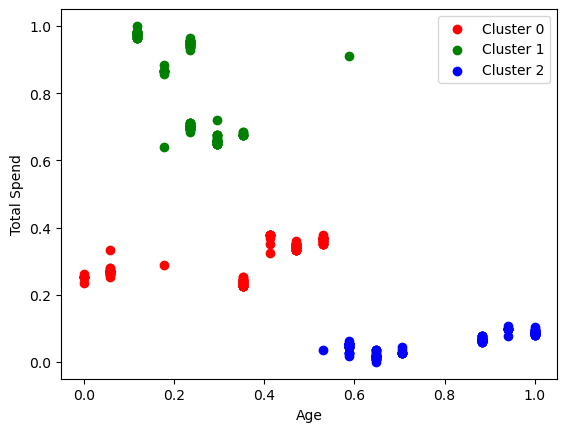

In [505]:
# Subset the DataFrame by clusters after Scaling
df1 = df[df.New_Cluster == 0]
df2 = df[df.New_Cluster == 1]
df3 = df[df.New_Cluster == 2]

# Plotting the scatter plots
plt.scatter(df1.Age, df1['Total Spend'], color='red', label='Cluster 0')
plt.scatter(df2.Age, df2['Total Spend'], color='green', label='Cluster 1')
plt.scatter(df3.Age, df3['Total Spend'], color='blue', label='Cluster 2')

# Labeling the axes
plt.xlabel('Age')
plt.ylabel('Total Spend')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


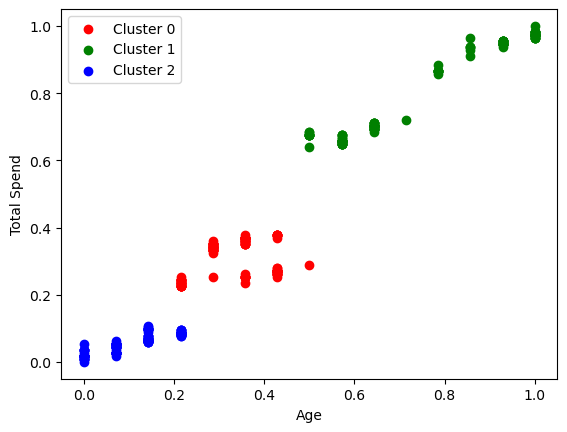

In [506]:
# Subset the DataFrame by clusters
df1 = df[df.New_Cluster == 0]
df2 = df[df.New_Cluster == 1]
df3 = df[df.New_Cluster == 2]

# Plotting the scatter plots
plt.scatter(df1[['Items Purchased']], df1['Total Spend'], color='red', label='Cluster 0')
plt.scatter(df2[['Items Purchased']], df2['Total Spend'], color='green', label='Cluster 1')
plt.scatter(df3[['Items Purchased']], df3['Total Spend'], color='blue', label='Cluster 2')

# Labeling the axes
plt.xlabel('Age')
plt.ylabel('Total Spend')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [507]:
# showing the centroid of clustering
km.cluster_centers_

array([[0.32679739, 0.30436535, 0.33272283],
       [0.23076923, 0.81163296, 0.75824176],
       [0.78600406, 0.05642188, 0.10652709]])

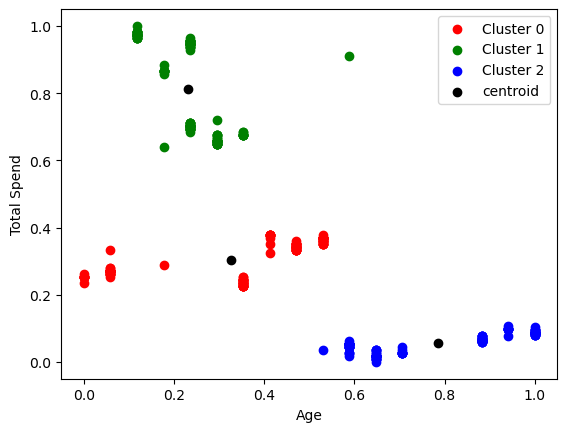

In [510]:
# Subset the DataFrame by clusters after scaling and showing centroid 
df1 = df[df.New_Cluster == 0]
df2 = df[df.New_Cluster == 1]
df3 = df[df.New_Cluster == 2]

# Plotting the scatter plots
plt.scatter(df1.Age, df1['Total Spend'], color='red', label='Cluster 0')
plt.scatter(df2.Age, df2['Total Spend'], color='green', label='Cluster 1')
plt.scatter(df3.Age, df3['Total Spend'], color='blue', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'Black',label='centroid')
# Labeling the axes
plt.xlabel('Age')
plt.ylabel('Total Spend')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

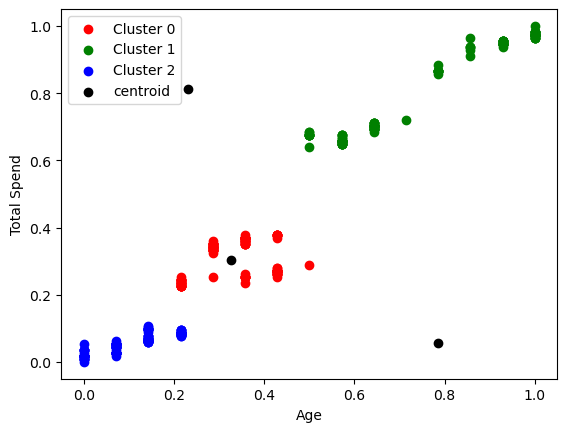

In [509]:
# Subset the DataFrame by clusters
df1 = df[df.New_Cluster == 0]
df2 = df[df.New_Cluster == 1]
df3 = df[df.New_Cluster == 2]

# Plotting the scatter plots
plt.scatter(df1[['Items Purchased']], df1['Total Spend'], color='red', label='Cluster 0')
plt.scatter(df2[['Items Purchased']], df2['Total Spend'], color='green', label='Cluster 1')
plt.scatter(df3[['Items Purchased']], df3['Total Spend'], color='blue', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'Black',label='centroid')
# Labeling the axes
plt.xlabel('Age')
plt.ylabel('Total Spend')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


# Make the Elbow Technique to show the Sum of Squared Error 

In [520]:
k_krg = range(1,11)
sse = []
for k in k_krg:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Total Spend','Items Purchased']])
    sse.append(km.inertia_)
    

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [518]:
sse

[96.58424691296719,
 34.66894241259553,
 15.992174545978232,
 10.334311189169332,
 6.068749189508009,
 2.6692837383699706,
 1.8899098827581404,
 1.4681530506543705,
 1.2476074197544722,
 1.0467078294249528]

number of cluster is 3 as showen according to elbow technique


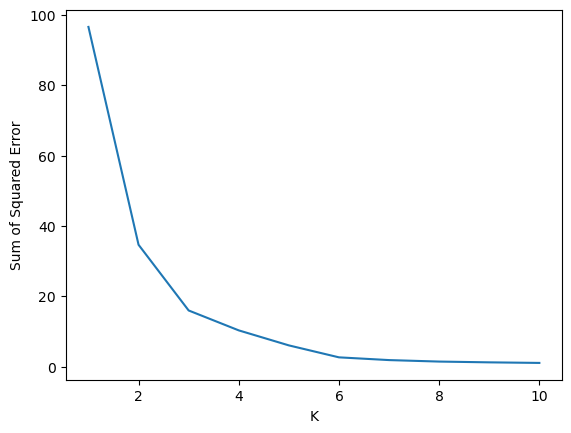

In [523]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_krg,sse)
print('number of cluster is 3 as showen according to elbow technique')